In [1]:
!python --version

Python 3.10.14


## Dataset : 
### Plant village dataset : 87k rgb images, kaggle(source)
### train conf: 80/20 split ratio for (train/val) 

In [2]:
#installing necessary libs 

!pip install torchsummary

In [3]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model


In [5]:
##3 checking the datasets

In [4]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [6]:
# printing the disease names
print(diseases)

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [5]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato___Late_blight,1851
Tomato___healthy,1926
Grape___healthy,1692
Orange___Haunglongbing_(Citrus_greening),2010
Soybean___healthy,2022
Squash___Powdery_mildew,1736
Potato___healthy,1824
Corn_(maize)___Northern_Leaf_Blight,1908
Tomato___Early_blight,1920
Tomato___Septoria_leaf_spot,1745


### see through graphs

Text(0.5, 1.0, 'Images per each class of plant disease')

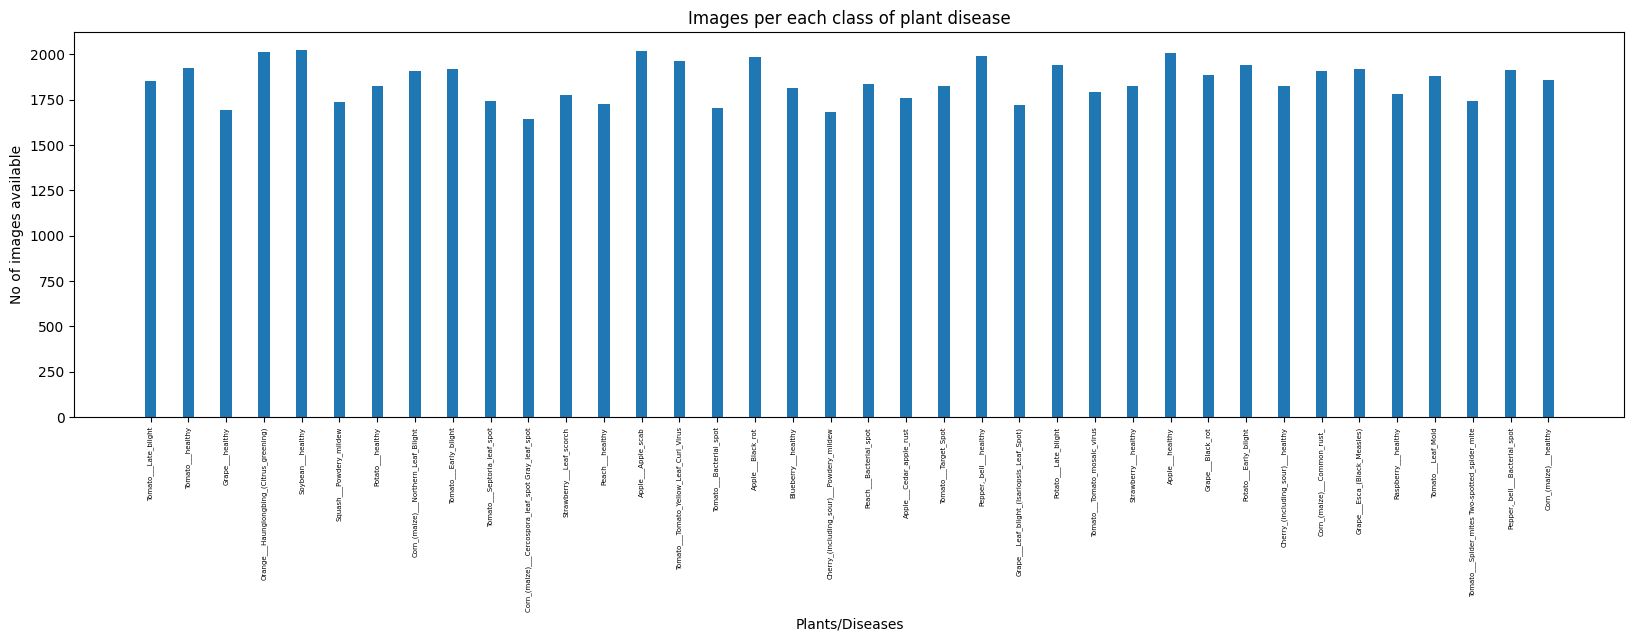

In [6]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

### Training part

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.models import resnet50
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from tqdm.notebook import tqdm

In [8]:
!pip install wandb tqdm

In [9]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.models import resnet50
from torch.optim.lr_scheduler import OneCycleLR
from tqdm import tqdm
import wandb
import os
import matplotlib.pyplot as plt
import numpy as np

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 190MB/s]
Epoch 10/10: 100%|██████████| 550/550 [05:24<00:00,  1.70batch/s, accuracy=0.999, loss=0.00623]


learning_rate,▃▆██▇▅▄▂▁▁
train_accuracy,▁▁▂▃▄▅▆▇██
train_loss,██▇▆▅▄▃▂▁▁
val_accuracy,▅▁▃▆▄▇████
val_loss,▃█▅▂▃▂▁▁▁▁
learning_rate,0.0
train_accuracy,0.99913
train_loss,0.00717
val_accuracy,0.99607
val_loss,0.01391


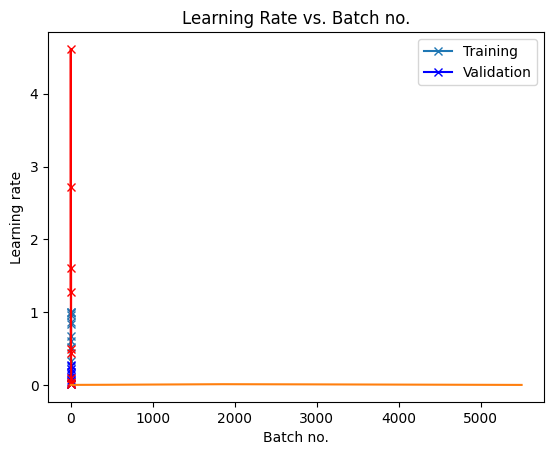

In [10]:
# Initialize WandB
wandb.init(project="plant-disease-detection", config={
    "epochs": 10,
    "batch_size": 128,
    "max_lr": 0.01,
    "grad_clip": 0.1,
    "weight_decay": 1e-4
})

# Set seed, device, and batch size
random_seed = 7
torch.manual_seed(random_seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = wandb.config.batch_size

# Define transformations and load datasets
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_data_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_data_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

train = datasets.ImageFolder(root=train_data_path, transform=transform)
valid = datasets.ImageFolder(root=valid_data_path, transform=transform)

train_dl = DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size=batch_size, num_workers=2, pin_memory=True)

# Load pre-trained ResNet-50 model and adjust the output layer
model = resnet50(pretrained=True)
num_classes = len(train.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Directory for saving models
save_dir = "./saved_models"
os.makedirs(save_dir, exist_ok=True)

# Define the evaluation function
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = nn.functional.cross_entropy(outputs, labels)
        val_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)
    val_loss /= len(val_loader)
    val_accuracy = correct / total
    return {"val_loss": val_loss, "val_accuracy": val_accuracy}

# Get current learning rate
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

# Training function with OneCycleLR and model saving
def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func=optim.Adam):
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    scheduler = OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    history = []
    
    for epoch in range(epochs):
        model.train()
        train_losses = []
        lrs = []
        epoch_loss = 0
        total_correct = 0
        total_images = 0
        
        with tqdm(train_loader, unit="batch") as tepoch:
            tepoch.set_description(f"Epoch {epoch+1}/{epochs}")
            for images, labels in tepoch:
                images, labels = images.to(device), labels.to(device)
                
                # Forward pass
                outputs = model(images)
                loss = nn.functional.cross_entropy(outputs, labels)
                train_losses.append(loss.item())
                
                # Backward pass
                loss.backward()
                
                # Gradient clipping
                if grad_clip:
                    nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                    
                optimizer.step()
                optimizer.zero_grad()
                
                # Update learning rate
                lrs.append(get_lr(optimizer))
                scheduler.step()
                
                _, preds = torch.max(outputs, dim=1)
                total_correct += torch.sum(preds == labels).item()
                total_images += labels.size(0)
                
                epoch_loss += loss.item()
                
                tepoch.set_postfix(loss=loss.item(), accuracy=total_correct / total_images)
        
        train_loss = epoch_loss / len(train_loader)
        train_accuracy = total_correct / total_images
        
        # Validation
        result = evaluate(model, val_loader)
        result["train_loss"] = train_loss
        result["train_accuracy"] = train_accuracy
        result["lrs"] = lrs
        history.append(result)
        
        # Log to WandB
        wandb.log({
            "train_loss": train_loss,
            "train_accuracy": train_accuracy,
            "val_loss": result["val_loss"],
            "val_accuracy": result["val_accuracy"],
            "learning_rate": lrs[-1]
        })
        
        # Save model checkpoint
        model_path = os.path.join(save_dir, f"model_epoch_{epoch+1}.pth")
        torch.save(model.state_dict(), model_path)
        
    return history

# Training the model
epochs = wandb.config.epochs
max_lr = wandb.config.max_lr
grad_clip = wandb.config.grad_clip
weight_decay = wandb.config.weight_decay

history = fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl, grad_clip=grad_clip, weight_decay=weight_decay)

# Finish wandb run
wandb.finish()

# Plotting utilities
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.')

# Plot the results
plot_accuracies(history)
plot_losses(history)
plot_lrs(history)
